In [1]:
import numpy as np
import matplotlib.pyplot as plt
#performs the forward operator (radon transform with a collection of line integrals)    
from skimage.transform import radon, resize
from skimage.data import shepp_logan_phantom
#Setting up the problem
from sklearn.datasets import fetch_openml

#MNIST data
X, y = fetch_openml("mnist_784", version=1, return_X_y=True,
as_frame=False, parser="pandas")
x_3 = X[111].astype('double')
x_8 = X[333].astype('double')

#Shepp-logan phantom
phantom = shepp_logan_phantom()
phantom_resized = resize(phantom, (28, 28), mode='reflect')
imsize = (28, 28)
theta = range(0,359, 13)

#Ground truth image
def show_image(x, title):
    plt.title(title)
    plt.imshow(np.reshape(x, imsize), cmap='gray')
    c = plt.colorbar()
    c.remove()




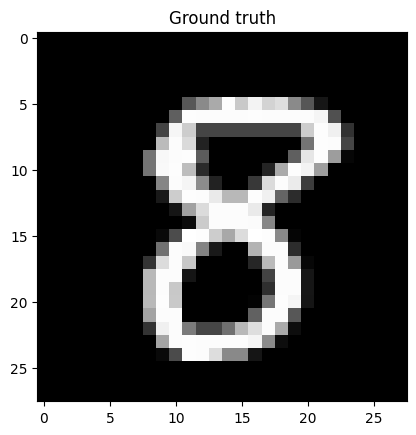

In [2]:

show_image(x_8, 'Ground truth')


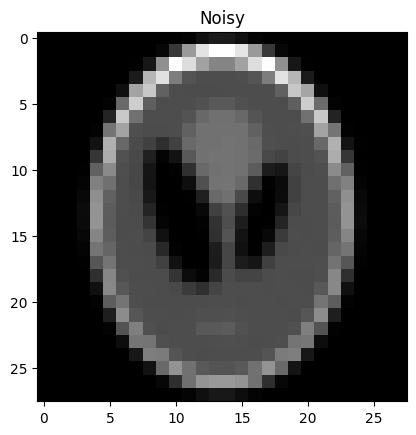

In [3]:
#noisy image
from skimage.util import random_noise

sigma = 0.001
noisy = random_noise(phantom_resized, var = sigma**2)
show_image(noisy, 'Noisy')

In [4]:
#Forward operator (CT Radon transform)
def trans(x):
    return radon(np.reshape(x, imsize), theta).ravel()

n = np.prod(imsize)
e = np.zeros(n)
A = np.zeros((n,n))
for i in range(len(e)):
    e[i] = 1
    Ae = trans(e)
    e[i] = 0
    A[:,i] = Ae


c:\Users\as5057\python-test\venv\Lib\site-packages\skimage\transform\radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


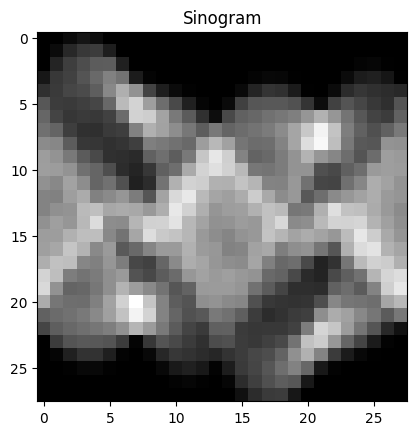

In [5]:
c1 =trans(x_3)
plt.title("Sinogram")
plt.imshow(np.reshape(c1, imsize),cmap='gray')

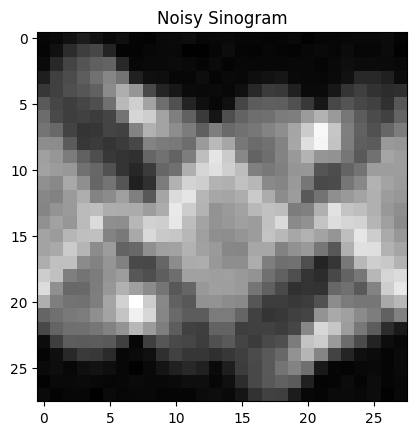

In [6]:
c = trans(x_3) + 50*np.random.standard_normal(c1.shape)
plt.title("Noisy Sinogram")
plt.imshow(np.reshape(c, imsize), cmap='gray')

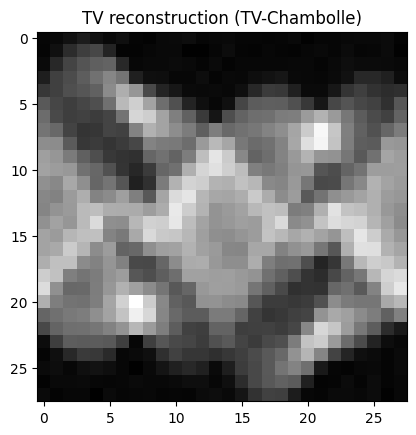

In [7]:
#TV denoising (ROF)
from skimage.restoration import denoise_tv_chambolle

plt.title('TV reconstruction (TV-Chambolle)')
tv_image = denoise_tv_chambolle(c, weight = 0.08)
plt.imshow(np.reshape(tv_image, imsize), cmap = 'gray')

(256, 256)

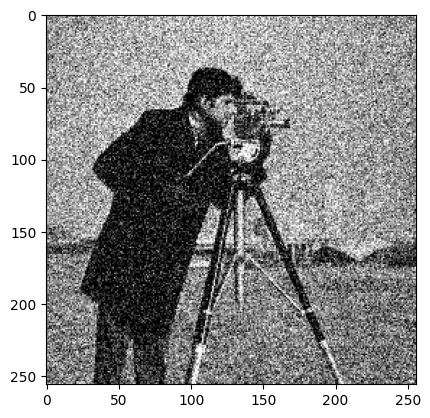

In [12]:
image = plt.imread('BM3D_images/Cameraman256.png')
sigma = 0.20
man = random_noise(image, var = sigma**2)

plt.imshow(man, cmap='gray')
man.shape

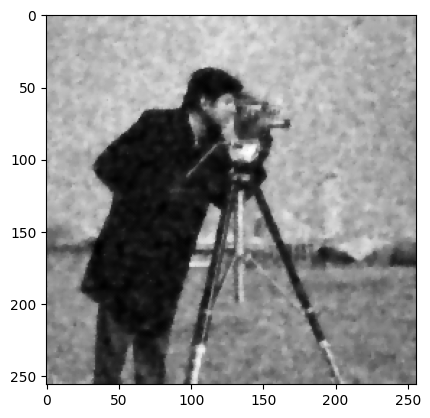

In [10]:
plt.imshow(denoise_tv_chambolle(man, weight = 0.21), cmap = 'gray')